# Assignment Sheets 3 & 4

In [1]:
using Pkg
Pkg.add("PyPlot") # adds a plotting package
Pkg.add("SpecialFunctions")
Pkg.add("Distributions")
Pkg.add("StatsBase")
using StatsBase
using PyPlot
using Random
using SpecialFunctions
using DelimitedFiles
using Statistics
using Distributions


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % [=========>                               ]  21.1 %]  42.1 %]  43.3 %==========================>              ]  64.4 %]  85.3 % Resolving package versions...
 Installed DualNumbers ─ v0.6.1
 Installed StatsBase ─── v0.26.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [fa6b7ba4] ↑ DualNumbers v0.6.0 ⇒ v0.6.1
  [2913bbd2] ↑ StatsBase v0.25.0 ⇒ v0.26.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [fa6b7ba4] ↑ DualNumbers v0.6.0 ⇒ v0.6.1
  [2913bbd2] ↑ StatsBase v0.25.0 ⇒ v0.26.0
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manif

┌ Info: Recompiling stale cache file /home/rcascorbi/.julia/compiled/v1.0/StatsBase/EZjIG.ji for StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/rcascorbi/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184


## Q 3.1 (a)

The following code imports the financial data, cleans it and plots the histogram of initial digits.

In [2]:
#Import the financial data and clean it
Fin=readdlm("companylist.csv", ',')
NAcount=0
for i in 1:length(Fin[:,3])
    if Fin[i,3]=="n/a"
        NAcount=NAcount+1
    end
end
size(Fin)


for i in 1:(size(Fin,1)-NAcount)
    if Fin[i,3] == "n/a"
        Fin=Fin[1:size(Fin,1) .!= i,: ]
    end
end


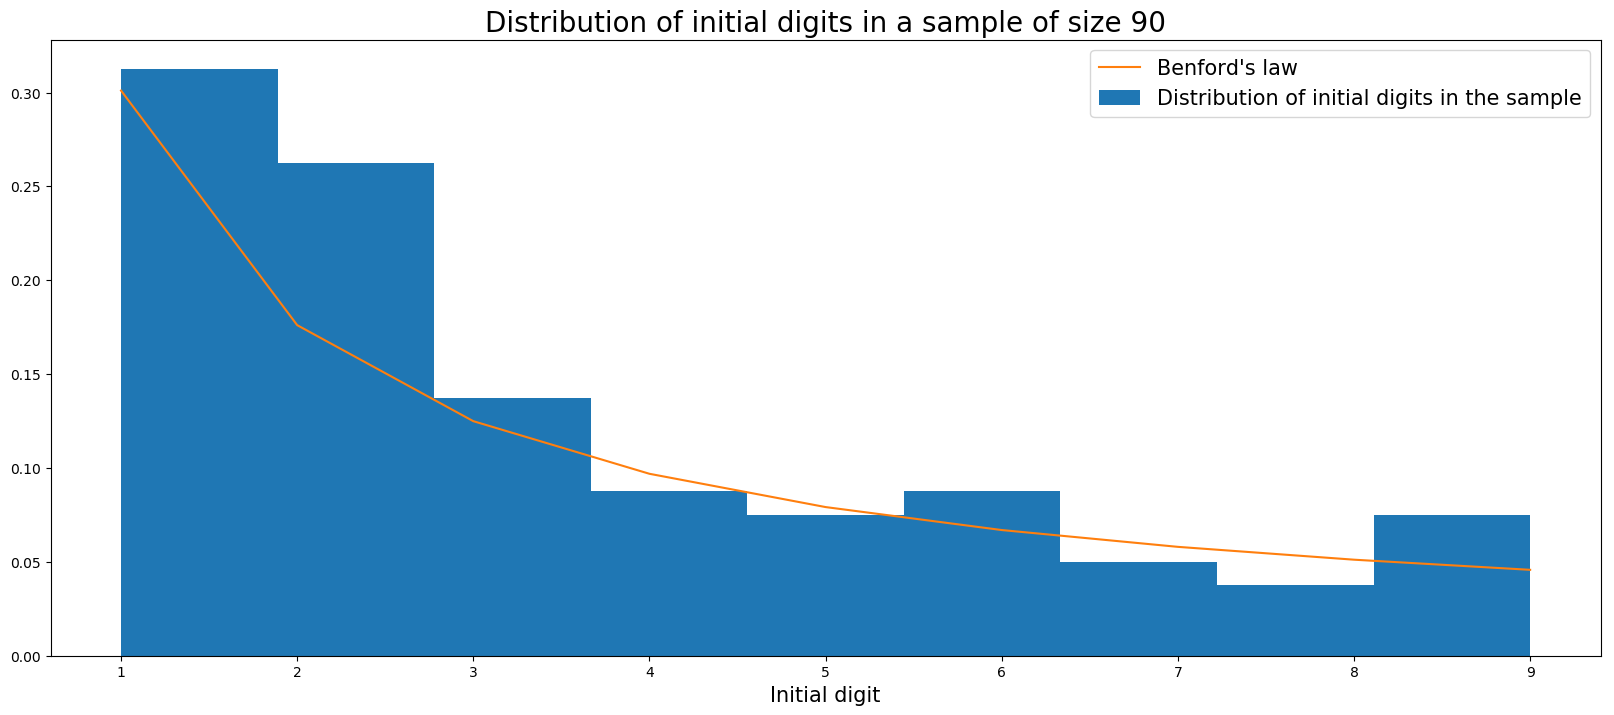

PyObject <matplotlib.legend.Legend object at 0x7f5088f935c0>

In [3]:
#Create a sample and extract the first digits of each element
sampleSize=90
samp=sample(Fin[:,3], sampleSize)
samp = [d[end] for d in digits.(Int.(floor.(samp.*1000)))] #first digits

#Plot the histogram and the theoretical distribution according to Benford's law
figure(figsize=(20,8))
plt[:hist](samp, 9, density=true,label="Distribution of initial digits in the sample")
plt[:plot](1:9, log.(10, 1 .+ 1 ./(1:9)), label="Benford's law")
title("Distribution of initial digits in a sample of size 90", fontsize=20)
xlabel("Initial digit", fontsize=15)
legend(fontsize=(15))


### (b)
The following code computes the p-values of Chi-squared tests with Null-hypotheses according to Benford's law and a uniform distribution of digits.

In [4]:
function getPValues(sample)
    digitRange=collect(1:9)
    HisArray=fit(Histogram, sample, nbins=9).weights
    HisArray=HisArray./sum(HisArray)
    uniform=ones(9) ./9
    benford=log.(10, 1 .+ 1 ./(1:9))
    ChiUni=length(sample)*sum(((HisArray .- uniform).^2)./(uniform))
    ChiBenford=length(sample)*sum(((HisArray .- benford).^2)./(benford))
    pUni=1-cdf(Chisq(8), ChiUni)
    pBenford=1-cdf(Chisq(8),ChiBenford)
    return pUni, pBenford
end



print("The p-value for the uniform distribution  and a sample size of 90 is ",getPValues(samp)[1])
print("      ")
print("The p-value for Benford's distribution and a sample size of 90 is ",getPValues(samp)[2])

The p-value for the uniform distribution  and a sample size of 90 is 9.046710491844578e-8      The p-value for Benford's distribution and a sample size of 90 is 0.8366795534095098

Using a sample size of n=90, the Chi-squared test clearly shows that the uniform distribution has to be rejected, while Benford's distribution should not be rejected with a p-value way above 5%.

### (c)
Repeat the calculations with a sample size of n=900.

In [14]:
samp2=sample(Fin[:,3], 900)
samp2 = [d[end] for d in digits.(Int.(floor.(samp2.*1000)))] #first digits
print("The p-value for the uniform distribution  and a sample size of 900 is ",getPValues(samp2)[1])
print("      ")
print("The p-value for Benford's distribution and a sample size of 900 is ",getPValues(samp2)[2])

The p-value for the uniform distribution  and a sample size of 900 is 0.0      The p-value for Benford's distribution and a sample size of 900 is 8.134205243259807e-6

As was to be expected, the p-value for the uniform distribution has decreased even more, in this case below the machine accuracy. The p-value for Benford's law has also decreased below 0.01. The reason for this is that The Chi-squared test is too accurate to take into account expected fluctuations around Benford's law in a sample size of 900.

## Q 3.2

The question asks whether or not the school is 'underperforming', which can be answered by a one-sided test the null-hypothesis being that the school performs average or above, i.e. that the underlying distribution has an average of **75 or above**.

The following code produces the p-value for this test.

In [6]:
sMES=7/sqrt(30)

pValue=1-cdf(Normal(72, sMES), 75)
#print(invlogcdf(Normal(72,sMES), log(0.95)))
print(pValue)

0.009452920389165897

The p-value is both below 5% and just below 1%. We can therefore reject the Null-hypothesis with both 5% and 1% accuracy.

# Q 3.3

The expression

$$\frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}$$

can be split up into to factors $\frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} $ and $ \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}$

The left factor can be expressed as follows

$$\frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} = \frac{1}{\sqrt{v  \pi}} \exp{\ln{\frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}}}}= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \ln{\Gamma{\left( \frac{v+1}{2} \right)}}-\ln{\Gamma{\left( \frac{v}{2} \right)}}\right]}$$ 

We can use Sterling's approximation to get the leading orders of the Gamma function for large arguments:

$$ \ln{\Gamma{n}} \approx n\ln{n}-n . $$

Thus up to order $n$ in the exponent we obtain

$$ \frac{1}{\sqrt{v  \pi}} \exp{\left[ \frac{v+1}{2} \ln{\left(\frac{v+1}{2}\right)} - \frac{v+1}{2} - \left(\frac{v}{2} \ln{\left(\frac{v}{2}\right)} -\frac{v}{2}  \right) \right]}  $$

Breaking up all logarithms into sums yields

$$  \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{v}{2} \left( \ln{v} + \ln{\left( 1+ \frac{1}{v} \right)} -\ln{2} \right) + \frac{1}{2}  \left( \ln{v} + \ln{\left( 1+ \frac{1}{v} \right)} -\ln{2} \right) -\frac{v}{2}\ln{v} +\frac{v}{2} +\frac{v}{2}\ln{2} -\frac{v}{2}-\frac{1}{2}  \right]} $$

$$= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{v}{2} \ln{\left( 1+ \frac{1}{v} \right)} + \frac{1}{2}  \left( \ln{v} + \ln{\left( 1+ \frac{1}{v} \right)} -\ln{2} \right)-\frac{1}{2}  \right]} $$

Taylor expand the logarithms of the form $\ln{1+\frac{1}{v}}$ retaining all terms in the exponent of order $1$ and above, yielding:

$$ \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{1}{2}  + \frac{1}{2}  \left( \ln{v}  -\ln{2} \right)-\frac{1}{2} + \mathcal{O}(\ln{\frac{v}{2}})  \right]}
= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{1}{2}  \left( \ln{v}  -\ln{2} \right) \right]} 
= \frac{1}{\sqrt{v  \pi}} \exp{ \left[ \frac{1}{2}  \ln{\frac{v}{2}} \right]}  
=\frac{1}{\sqrt{v  \pi}} \sqrt{\frac{v}{2}}
=\frac{1}{\sqrt{2 \pi}}
$$

No we take the limit of the second factor of the t-distribution, rewriting

$$\frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}= \exp{ \ln {\left[ \left( 1+\frac{t^2}{v} \right) ^{-\frac{v+1}{2}} \right]}}= \exp{ \left[-\frac{v+1}{2} \ln { \left( 1+\frac{t^2}{v} \right) } \right]} $$

Taylor expanding the logarithms up to order 1 in the exponent yields

$$ \exp{ \left[ -\frac{v+1}{2} \left( \frac{t^2}{v} + \mathcal{O}(\frac{1}{v^2}) \right) \right]}=\exp{ \left[ -\frac{t^2}{2} + \mathcal{O}(\frac{1}{v}) \right]}$$

In the limit of large $v$ this simply yields

$$ \exp \left[ -\frac{t^2}{2} \right] $$

Reuniting the two factors we obtain the limiting distribution, which is a Gaussian distribution with zero mean and  unit variance:

$$\lim_{v \rightarrow \infty} \frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} = \frac{1}{\sqrt{2 \pi}} e^{ -\frac{t^2}{2}}$$

### First order correction to the variance

In order to obtain the first-order correction to the limit of the t-distribution variance for large n, we have to derive a general expression for the variance of the t-distribution.

First, calculate the mean of the t-distribution

$$E[t]= \int_{-\infty}^{\infty} t \frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} dt$$

Since $ \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}}$ is an even function of $t$ and $t$ is odd, the integral evaluates to zero, thus

$$ E[t]=0.$$

The variance is thus simply the second moment of the t-distribution, namely

$$ Var[t]= \int_{-\infty}^{\infty} t^2 \frac{1}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \frac{1}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} dt.$$

Pulling all constants to the front and exploiting the fact that the integral's $t$-dependence is symmetrical, we can rewrite it as

$$Var[t]= \frac{2}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \int_{0}^{\infty} \frac{t^2}{\left( 1+ \frac{t^{2}}{v} \right)^{(v+1)/2}} dt.$$


Now we perform a change of variables $y=(1+\frac{t^2}{v})^{-1}$, such that $dt=\frac{v}{2 y^2} \frac{1}{\sqrt{v \left( \frac{1}{y}-1 \right)}}dy$. This way out integral becomes

$$ \frac{2}{\sqrt{v  \pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \int_{0}^{1} dy v \left(\frac{1}{y}-1 \right) y^{\frac{v+1}{2}} \frac{v}{2 y^2} \frac{1}{\sqrt{v \left( \frac{1}{y}-1 \right)}} $$

$$= \frac{v}{\sqrt{\pi}} \frac{\Gamma{\left( \frac{v+1}{2} \right)}}{\Gamma{\left( \frac{v}{2} \right)}} \int_{0}^{1} dy \left( 1-y \right)^\frac{1}{2} y^{\frac{v}{2}-2}$$

Exploiting the fact that $\Gamma{(\frac{1}{2})}=\pi$ and that the integral resembles a gamma distribution with normalisationf factor

$$\int_{0}^{1}  x^{p-1} (1-x)^{q-1} dx =\frac{\Gamma{(p)}\Gamma{(q)}}{\Gamma{(p+q)}} $$

with $p=\frac{v}{2}-1$ and $q=\frac{3}{2}$, we can evaluate the integral to

$$ Var[t]=v \frac{\Gamma{(\frac{v}{2}-1)}\Gamma{(\frac{3}{2})}}{\Gamma{(\frac{1}{2})}\Gamma{(\frac{v}{2})}}=\frac{v}{v-2}.  $$

Finally, we can expand the expression of the variance of the t-distribution for large v:

$$ Var[t]=\frac{v}{v-2}= \frac{1}{1-\frac{2}{v}} = 1+\frac{2}{v} +\mathcal{O}(v^{-2})$$

# Q 4.1

Suppose we draw a sample $X_1, X_2, ..., X_n$ from a normal distribution. The likelihood that one of tese $X_i$ is drawn from a normal distribution with mean $μ$ and variance $σ^2$ is 

$$ \mathcal{L} \left( X_i  | \mathcal{N}(μ, σ) \right)=\frac{1}{\sqrt{2 \pi σ^2}} e^{-\frac{(X_i-μ)^2}{2σ^2}}  $$

Since all these $X_i$ are independent of each other, the likelyhood that they were all drawn from the same Normal distribution with mean $μ$ and variance $σ^2$ is 

$$ \mathcal{L} \left( X_1, X_2, ..., X_n  | \mathcal{N}(μ, σ) \right) \sim \prod_{i=1}^{n} \left[ \frac{1}{\sqrt{2 \pi σ^2}} e^{-\frac{(X_i-μ)^2}{2σ^2}} \right], $$

which can be normalised if needed. 

The values of μ and σ that maximise the likelihood $\mathcal{L} \left( X_1, X_2, ..., X_n  | \mathcal{N}(μ, σ) \right)$ can be found by finding the maxima of the logarithm of this expression. 

$$ \ln \mathcal{L}\left( X_1, X_2, ..., X_n  | \mathcal{N}(μ, σ) \right) = \ln \left( \prod_{i=1}^{n} \left[ \frac{1}{\sqrt{2 \pi σ^2}} e^{-\frac{(X_i-μ)^2}{2σ^2}} \right] \right) $$ 

$$
= \sum_{i=1}^{n} \ln \left( \frac{1}{\sqrt{2 \pi σ^2}} e^{-\frac{(X_i-μ)^2}{2σ^2}}  \right) 
=\sum_{i=1}^{n} \left[ \ln  e^{-\frac{(X_i-μ)^2}{2σ^2}} -\ln \left( \sqrt{2 \pi σ^2} \right) \right]
= \sum_{i=1}^{n} \left[   -\frac{(X_i-μ)^2}{2σ^2} -\ln(\sqrt{2 \pi}σ)  \right]
$$

No we differentiate this expression partially, once with respect to μ and once with respect to σ. We set the result equal zero to determine the values of μ and σ that maximise the likelihood. Let's start out with μ:

$$
\frac{\partial}{\partial μ} \ln \mathcal{L}\left( X_1, X_2, ..., X_n  | \mathcal{N}(μ, σ) \right)= \sum_{i=1}^{n} \frac{X_i-μ}{σ^2}=0
$$

This yields

$$ \hat{μ}=\frac{1}{n} \sum_{i=1}^{n} X_i= \bar{X},$$

which is equal to the mean of the sample.

The variance maximising the likelihood can be determined in a very similar way:

$$\frac{\partial}{\partial σ} \ln \mathcal{L}\left( X_1, X_2, ..., X_n  | \mathcal{N}(μ, σ) \right)=  \sum_{i=1}^{n} \left[\frac{(X_i-μ)^2}{σ^3}  -\frac{1}{σ} \right]=0$$

Thus

$$
\hat{σ}^2=\frac{1}{n} \sum_{i=1}^{n} (X_i-μ)^2
$$

Inserting $\hat{μ}=\bar{X}$ for $μ$ yields

$$
\hat{σ}^2=\frac{1}{n} \sum_{i=1}^{n} (X_i-\bar{X})^2=\bar{σ}^2,
$$

which is the sample variance. As we have shown in class, the sample variance is not an unbiased estimator of the actual underlying *population variance* σ^2 of the distribution that the sample was actually drawn from. In fact, it can be shown that

$$ E\left[ \hat{σ}^2 \right]= σ^2- E\left[ ( \bar{X} - μ )^2  \right] = \left(1-\frac{1}{n} \right) σ^2 < σ^2. $$

Thus, we can define an *unbiased sample variance* 

$$σ_{unbiased}^2=\frac{1}{n-1} \sum_{i=1}^{n} (X_i-\bar{X})^2, $$

which based on the above argument *can* be shown to be an unbiased estimator of the population variance.

# Q 4.2

In [7]:
# Function to calculate posterior distribution given ranges of discritised μ, variance, a prior and a set of datapoints.
function getPosterior(Range1, Range2, Prior,data)
    Likelihood=ones(length(Range1), length(Range2))
    for k in 1:length(data)
        for i in 1:length(Range1)
            for j in 1:length(Range2)
                Likelihood[i,j]=Likelihood[i,j]*1/(sqrt(2*pi*Range2[j]))*exp(-((data[k]-Range1[i])^2)/(2*Range2[j]))
            end
        end
    end
    return (Likelihood .*Prior)./(sum(Likelihood .*Prior))
end
    
#function to compute mean and variance of data points.
function getMuVar(dat)
    mu=mean(dat)
    sig=(1/(length(dat)))*sum((dat .-mu).^2 )
    return mu, sig
end

getMuVar (generic function with 1 method)

In [8]:
#Set values for mu and sigma
μ=2
σ=1
variance=σ^2
n=5
data=rand(Normal(μ, σ), n)
muRange=collect(0:0.01:4)
varRange=collect(0.01:0.01:3)
Prior=ones(length(muRange),length(varRange))./(length(muRange)*length(varRange))
Posterior=getPosterior(muRange, varRange, Prior, data)
print(getMuVar(data))
print(findmax(Posterior)[2][1]*0.01, " Variance ", findmax(Posterior)[2][2]*0.01)

muMarginal=sum(Posterior, dims=2)[:,1]
varMarginal=sum(Posterior, dims=1)[1,:]
;

(2.1552497283342062, 0.3451290176635098)2.17 Variance 0.35000000000000003

The following plot shows the posterior distribution of the mean and the variance, based on a uniform prior, discritised into steps of 0.01 for both mean and variance. The horizontal and vertical lines pick out particular values of the mean and the variance, namely the maximum of the 2D posterior distribution, the maxima of its respective marginal distributions, as well as the values for the mean and variance that were initially set to create the simulation data.

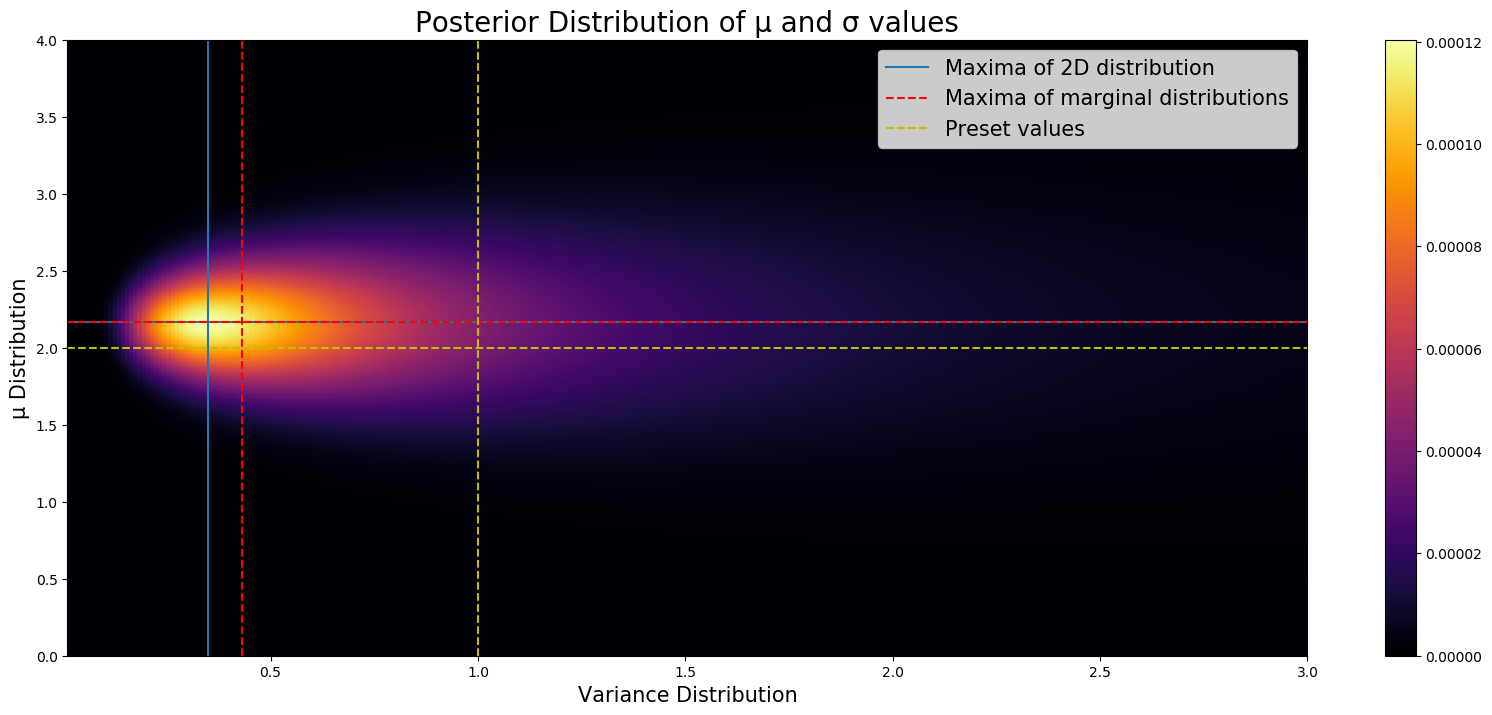

PyObject <matplotlib.legend.Legend object at 0x7f5088d1ec18>

In [9]:
figure(figsize=(20,8))
#theme(:sand)
#heatmap(sigmaRange, muRange,Posterior)
plt[:pcolormesh](varRange, muRange, Posterior, cmap="inferno")
plt[:axvline](x=findmax(Posterior)[2][2]*0.01, label="Maxima of 2D distribution")
plt[:axhline](y=findmax(Posterior)[2][1]*0.01)
plt[:axvline](x=findmax(varMarginal)[2][1]*0.01, color="r",linestyle="--", label="Maxima of marginal distributions")
plt[:axhline](y=findmax(muMarginal)[2][1]*0.01, color="r",linestyle="--")
plt[:axvline](x=variance, color="y",linestyle="--", label="Preset values")
plt[:axhline](y=μ, color="y",linestyle="--")
title("Posterior Distribution of μ and σ values", fontsize=20)
colorbar()
xlabel("Variance Distribution", fontsize=15)
ylabel("μ Distribution", fontsize=15)
legend(fontsize=15)

The following bit of code compares the position of the maximum of the posterior distribution to $\hat{μ}$ and $\hat{σ}$ that maximise the likelihood of our data points, as derived in Q 4.1. As expected, the values coincide.

In [10]:
print("The value of μ maximising the posterior distribution is ", findmax(Posterior)[2][1]*0.01, ", while the theoretically computed value is ", getMuVar(data)[1],". ")
print("Similarly, the value of the variance maximising the posterior distribution is ", findmax(Posterior)[2][2]*0.01, ", while the theoreticall computed value is ", getMuVar(data)[2], ".")

The value of μ maximising the posterior distribution is 2.17, while the theoretically computed value is 2.1552497283342062. Similarly, the value of the variance maximising the posterior distribution is 0.35000000000000003, while the theoreticall computed value is 0.3451290176635098.

The following plots show the marginals of the 2D posterior distribution. It can be seen that the value of μ that maximises the 2D posterior distribution is the same as the value of μ that maximises the marginal distribution, which is the same as the theoretical $\hat{μ}$.

However, this is not the case for the variance. The value maximising the marginal distribution tends to be larger than that maximising the 2D posterior. However, it can be see that the **unbiased sample variance** $σ_{unbiased}^2$ calculated in Q 4.1 maximises the marginal posterior distribution.

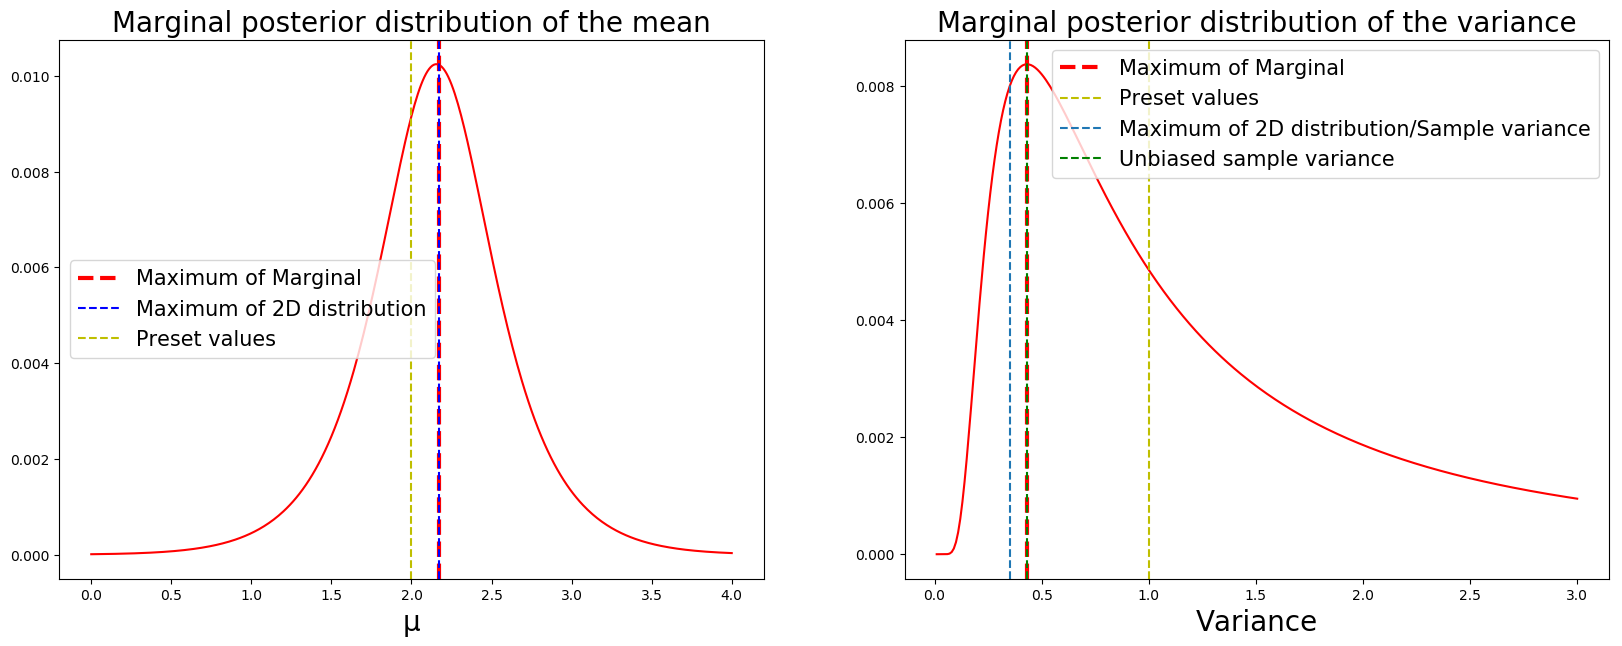

PyObject <matplotlib.legend.Legend object at 0x7f50841c99b0>

In [11]:
figure(figsize=(20,7))
subplot(121)
title("Marginal posterior distribution of the mean", fontsize=20)
plt[:plot](muRange, muMarginal, color="r")
plt[:axvline](x=findmax(muMarginal)[2][1]*0.01, color="r", linestyle="--",linewidth=3, label="Maximum of Marginal")
plt[:axvline](x=findmax(Posterior)[2][1]*0.01, color="b",linestyle="--", label="Maximum of 2D distribution")
plt[:axvline](x=μ, color="y",linestyle="--", label="Preset values")


xlabel("μ", fontsize=20)
legend(fontsize=15)

subplot(122)
title("Marginal posterior distribution of the variance", fontsize=20)
plt[:plot](varRange, varMarginal, color="r")
plt[:axvline](x=findmax(varMarginal)[2][1]*0.01, color="r", linestyle="--",linewidth=3,label="Maximum of Marginal")
plt[:axvline](x=variance, color="y",linestyle="--", label="Preset values")
plt[:axvline](x=findmax(Posterior)[2][2]*0.01, linestyle="--",label="Maximum of 2D distribution/Sample variance")
plt[:axvline](x=getMuVar(data)[2]*length(data)/(length(data)-1), color="g", linestyle="--", label="Unbiased sample variance")
xlabel("Variance", fontsize=20)
legend(fontsize=15)
